**1. Basics of a Series RLC Circuit**

A series RLC circuit consists of a resistor 𝑅, inductor 𝐿, and capacitor 𝐶 connected in series. When connected to a DC power supply, the transient behavior and the steady-state behavior of the circuit are of interest.

**2. Governing Equation**

Using Kirchhoff's Voltage Law (KVL):

The sum of the voltage drops across the resistor, inductor, and capacitor equals the applied voltage:

$$V_{S}=V_{R}+V_{L}+V_{C}$$

Expanding:

$$V_{S}=iR+L\frac{di}{dt}+\frac{1}{C}\int_{}^{}idt$$

Differentiating this equation with respect to 𝑡, we get:

$$L\frac{d^{2}i}{dt^{2}}+R\frac{di}{dt}+\frac{i}{C}=0$$

**3. Solving the Differential Equation**

This is a second-order linear differential equation. The general solution depends on the characteristic equation:

$$Lr^{2}+Rr+\frac{1}{C}=0$$

The roots of the characteristic equation (𝑟<sub>1</sub> and 𝑟<sub>2</sub>) determine the system's behavior:

$$r=\frac{-R\pm \sqrt{R^{2}-4\frac{L}{C}}}{2L}$$

* Overdamped (𝑅<sup>2</sup>>4𝐿/𝐶): Roots are real and distinct.
* Critically damped (𝑅<sup>2</sup>=4𝐿/𝐶): Roots are real and equal.
* Underdamped (𝑅<sup>2</sup><4𝐿/𝐶): Roots are complex conjugates.

**4. Transient Current Response**

Overdamped:

$$i(t)=A_{1}e^{r_{1}t}+A_{2}e^{r_{2}t}$$

Critically damped:

$$i(t)=(A_{1}+A_{2})e^{rt}$$

Underdamped:

$$i(t)=e^{-\alpha t}(B_{1}cos(\omega t)+B_{2}cos(\omega t))$$

Here:

$$\alpha=\frac{R}{2L} \;\; , \;\;\omega=\sqrt{\frac{1}{LC}-\alpha^{2}}$$

Constants 𝐴<sub>1</sub>,𝐴<sub>2</sub>,𝐵<sub>1</sub>,𝐵<sub>2</sub> are determined by initial conditions.

**5. Steady-State Behavior**

In a DC circuit:

* The capacitor acts as an open circuit (𝑖<sub>𝐶</sub>=0).
* The inductor behaves as a short circuit (𝑉<sub>𝐿</sub>=0).

Thus, after the transient response has decayed:

$$i=\frac{V_{S}}{R}$$

**6. Numerical Example**

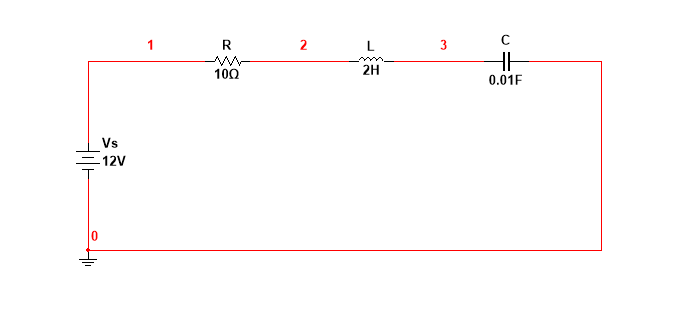

Given:

* 𝑉𝑠=12 V
* 𝑅=10 Ω
* 𝐿=2 H
* 𝐶=0.01 F

Steps:

(a) Characteristic Equation:

$$2r^{2}+10r+100=0$$

Roots:

$$r_{1,2}=-2.5\pm j\sqrt{\frac{75}{2}}$$

(b) Current Response:

This is underdamped:

$$i(t)=e^{-2.5t}(B_{1}cos(4.33t)+B_{2}sin(4.33t))$$

(c) Steady-State:

$$if \;\; t\to \infty \;\;i=\frac{V_{S}}{R}=\frac{12}{10}=1.2$$

**Python Code**

The Python code calculates and plots the current response 𝑖(𝑡) of the series RLC circuit under the underdamped condition, as discussed. It also overlays the steady-state current on the plot for reference.

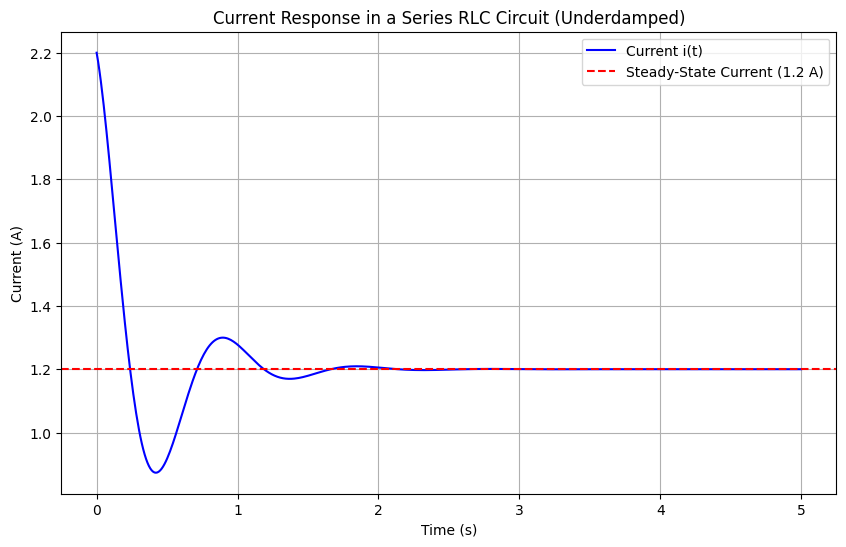

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rlc_circuit_response(Vs, R, L, C, t):
    # Constants
    alpha = R / (2 * L)
    omega_0 = 1 / np.sqrt(L * C)
    omega_d = np.sqrt(omega_0**2 - alpha**2) if alpha < omega_0 else 0  # Damped frequency

    # Transient response (underdamped case assumed)
    if alpha < omega_0:
        # Constants for the transient response (arbitrary for demonstration)
        B1, B2 = 1, 0  # Initial conditions can modify these
        i_t = np.exp(-alpha * t) * (B1 * np.cos(omega_d * t) + B2 * np.sin(omega_d * t))
    else:
        raise ValueError("The circuit is not underdamped in this configuration.")

    # Steady-state current
    i_ss = Vs / R

    return i_t + i_ss

# Parameters
Vs = 12  # Voltage source (V)
R = 10   # Resistance (Ohms)
L = 2    # Inductance (H)
C = 0.01 # Capacitance (F)
t = np.linspace(0, 5, 500)  # Time array (s)

# Calculate current response
i = rlc_circuit_response(Vs, R, L, C, t)

# Plot the response
plt.figure(figsize=(10, 6))
plt.plot(t, i, label='Current i(t)', color='b')
plt.axhline(Vs / R, color='r', linestyle='--', label='Steady-State Current (1.2 A)')
plt.title("Current Response in a Series RLC Circuit (Underdamped)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend()
plt.grid()
plt.show()